In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# Loop through the directories and files but do not print them
for dirname, _, filenames in os.walk('/kaggle/input'):
   
    pass  


In [2]:
# Importing necessary libraries for data processing, visualization, and deep learning
import numpy as np 
import pandas as pd  
import os  

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for deep learning
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2  # For image processing tasks

# Pre-trained models for transfer learning
from tensorflow.keras.applications import VGG16, InceptionResNetV2

# Regularization and optimizers
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax


In [3]:
# Define the path to the directory containing the training images
train_dir = "/kaggle/input/fer2013/train"

# Define the path to the directory containing the testing images
test_dir = "/kaggle/input/fer2013/test"


In [4]:
# Set the image size to 48x48 pixels, which will be used for resizing images
img_size = 48


In [5]:
# Data augmentation for training images to improve model generalization
train_datagen = ImageDataGenerator(
    # rotation_range = 180,  
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=True, 
    rescale=1.0 / 255,
    # zoom_range = 0.2, 
    validation_split=0.2 
)

# Data preparation for validation images, only normalizing pixel values
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2 
)


In [6]:
# Create a data generator for training images
train_generator = train_datagen.flow_from_directory(
    directory=train_dir, 
    target_size=(img_size, img_size),  
    batch_size=64,  
    color_mode="grayscale",  
    class_mode="categorical",  
    subset="training"  
)

# Create a data generator for validation images
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,  
    target_size=(img_size, img_size),  
    batch_size=64,  
    color_mode="grayscale",  
    class_mode="categorical",  
    subset="validation"  
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [7]:
# Building a Convolutional Neural Network (CNN) using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(7, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Initialize the Adam optimizer with a learning rate of 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model with the chosen optimizer, loss function, and evaluation metric
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy',  
    metrics=['accuracy']  
)

# Display the summary of the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,841,543 (14.65 MB)

 Trainable params: 3,837,575 (14.64 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [9]:
# Set the number of epochs for training the model
epochs = 100  

# Set the batch size, i.e., the number of samples to process before updating the model
batch_size = 64  


In [10]:
# Define the path to save or load the model
model_path = '/kaggle/working/model_fer2013.h5'

if os.path.exists(model_path):
    print("Loading pre-trained model...")
    model = tf.keras.models.load_model(model_path)
else:
    print("Training a new model from scratch...")
    
    # Compile the model (ensures it's ready for training)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x=train_generator,
                        epochs=100,
                        validation_data=validation_generator)

    # Save the trained model
    model.save(model_path)
    print(f"Model trained and saved at {model_path}")


Training a new model from scratch...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 137s 339ms/step - accuracy: 0.1711 - loss: 9.5951 - val_accuracy: 0.2472 - val_loss: 8.5222
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.2065 - loss: 8.5168 - val_accuracy: 0.2542 - val_loss: 7.5559
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.2384 - loss: 7.5292 - val_accuracy: 0.3303 - val_loss: 6.5599
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.2694 - loss: 6.5817 - val_accuracy: 0.3471 - val_loss: 5.6574
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.2941 - loss: 5.6917 - val_accuracy: 0.3841 - val_loss: 4.8648
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.3396 - loss: 4.8947 - val_accuracy: 0.3911 - val_loss: 4.2875
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.3647 - loss: 4.2491 - val_accuracy: 0.4043 - val_loss: 3.7417
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.3849 - loss: 3.7177 - va

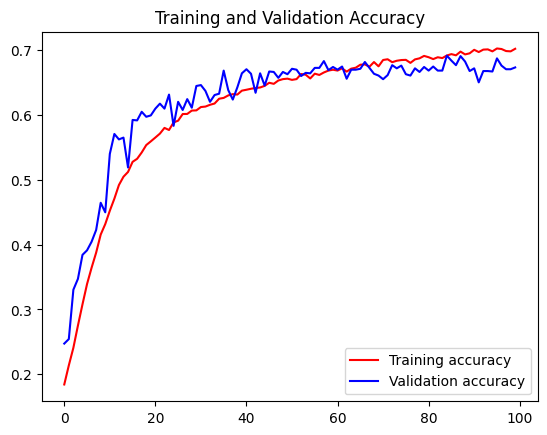

<Figure size 640x480 with 0 Axes>

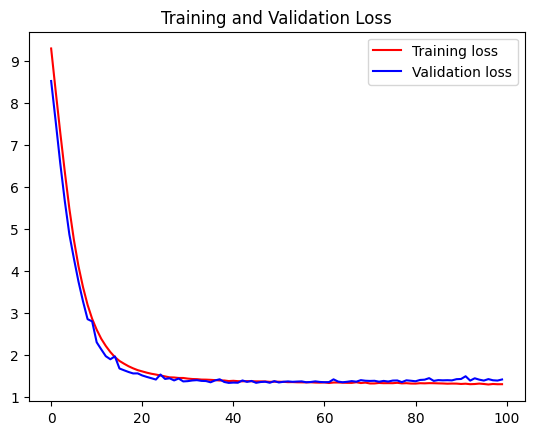

In [11]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy and loss values from the history object
accuracy = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']  
val_loss = history.history['val_loss']  

# Define the range for epochs (number of iterations)
epochs = range(len(accuracy))

# Plot training and validation accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')  
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  
plt.title('Training and Validation Accuracy')  
plt.legend(loc=0)  
plt.figure()  

# Show the plot for accuracy
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')  
plt.plot(epochs, val_loss, 'b', label='Validation loss')  
plt.title('Training and Validation Loss')  
plt.legend(loc=0)  

# Show the plot for loss
plt.show()


In [12]:
# Save the trained model to a file in H5 format
model.save('model_fer2013.h5')  


In [13]:
# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(train_generator)  

# Evaluate the model on the validation (test) data
test_loss, test_acc = model.evaluate(validation_generator) 

# Print the final training and validation accuracies as percentages
print("Final training accuracy = {:.2f}%, validation accuracy = {:.2f}%".format(train_acc * 100, test_acc * 100))


359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.7682 - loss: 1.1285
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6681 - loss: 1.4370
Final training accuracy = 76.53%, validation accuracy = 67.32%


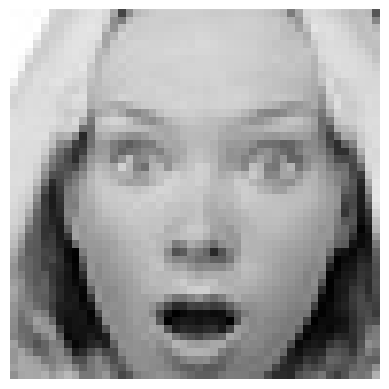

Image shape: (48, 48)


In [14]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the specified path, resize it to 48x48 pixels, and convert it to grayscale
img = image.load_img("/kaggle/input/fer2013/test/surprise/PublicTest_7431524.jpg", target_size=(48, 48), color_mode="grayscale")

# Convert the loaded image into a numpy array
img = np.array(img)

# Display the image using matplotlib
plt.imshow(img, cmap='gray')  
plt.axis('off')  
plt.show()

# Print the shape of the image array
print(f"Image shape: {img.shape}")


In [15]:
# Dictionary mapping numeric labels to emotion categories
label_dict = {
    0: 'Angry',     
    1: 'Disgust',   
    2: 'Fear',      
    3: 'Happy',     
    4: 'Neutral',   
    5: 'Sad',       
    6: 'Surprise'   
}


In [16]:
img = np.expand_dims(img, axis=0)  # The shape becomes (1, 48, 48) - adding the batch dimension

img = img.reshape(1, 48, 48, 1)  # The shape becomes (1, 48, 48, 1)

result = model.predict(img)

# Convert the result 
result = list(result[0])

print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [17]:

img_index = result.index(max(result))  


print(label_dict[img_index])  # Print the predicted emotion label

plt.show()  # Show the image plot 


Surprise


In [18]:
model.save_weights('model_weights.weights.h5')
